In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as optim

from itertools import product

# Always make it pretty.
plt.style.use('ggplot')

import samplers as spl

# The Normal (a.k.a. Gaussian) Distribution

The **normal** or **gaussian** distribution has a hallowed place in statistical folklore, mostly due to the **central limit theorem** which we will study shortly.

Text(0.5,1,'PDF from Normal(mu=0, sigma=1)')

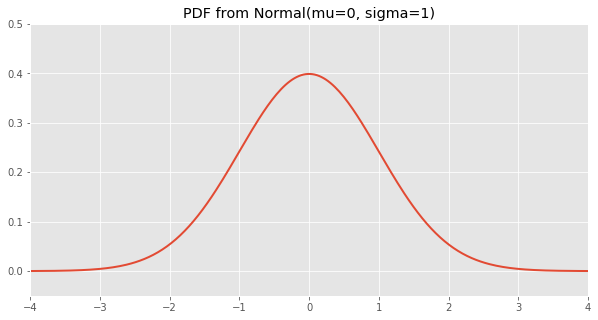

In [3]:
normal_dist = spl.Normal(0, 1)
x = np.linspace(-4, 4, num=250)
fig, axs = plt.subplots(1, 1, figsize=(10, 5))
axs.plot(x, normal_dist.pdf(x), linewidth=2)
axs.set_ylim(-0.05, 0.5)
axs.set_xlim(-4, 4)
axs.set_title("PDF from Normal(mu=0, sigma=1)")

## Parameters of the Normal Distribution are $\mu$ and $\sigma$

+ The $\mu$ parameter is the mean.
+ $\sigma$ is the standard deviation. $\sigma$^2 is the variance. Both are measures of dispersion around the mean. The standard deviation is easier to interpret since it has the same measurement units of population that created the normal distribution.

Together, these parameters change the shape of the normal distribution probability density function (PDF) and cumulative desnity function (CDF). *The height of y-axis is the proportion of the population at that value*.

The CDF shows *the proportion of the population that lies below that point in the population*.

It is also useful to remember the **68-95-99.7** rules:

+ 68% of the population lies within $\pm1\sigma$ of the the mean $\mu$
+ 95% of the population lies within $\pm2\sigma$ of the the mean $\mu$
+ 99.7% of the population lies within $\pm3\sigma$ of the the mean $\mu$

What units are on the x-axis of the PDF and CDF? The x-axis is where the standard deviation and variance ($\sigma$ and $\sigma^2$) lie. If $\sigma = 1$, then the units on the x-axis are standard deviations.

### PMFs and PDFs

The smooth coninuous curves that you see in this lesson are from probability density functions. The smooth curves come from coninuous values. Probability mass functions (PMFs), in contrast, are made of counts of discrete values, or counts into bins of continuous values within certain ranges. They are represented as histograms which you will see below.

### Do you want even more?????

Incidentally, the function that yields the bell-shaped curve that is frequently shown is the PDF. which takes the form:

$$ f(x | \mu, \sigma^2) = \frac{1}{\sqrt{2 \sigma^2 \pi}} e^{ - \frac{(x - \mu)^2}{2 \sigma^2} } $$

The CDF of the normal distribution is:

$$ \Phi (t) = \frac{1}{\sqrt{2 \sigma^2 \pi}} \int_{- \infty}^t e^{ - \frac{(x - \mu)^2}{2 \sigma^2} } dx $$

The integral for the CDF of the normal distribution does *not* have a closed form and must be solved numerically with a computer.

Thankfully, you won't need to deal with those equations directly. Python will make your life much easier here!

[The Normal Distribution Wikipedia page contains incredible detail](https://en.wikipedia.org/wiki/Normal_distribution) if you want to research more

## Changing $\mu$ translates (shifts) the distribution function to the right and left

/Users/alicakey/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


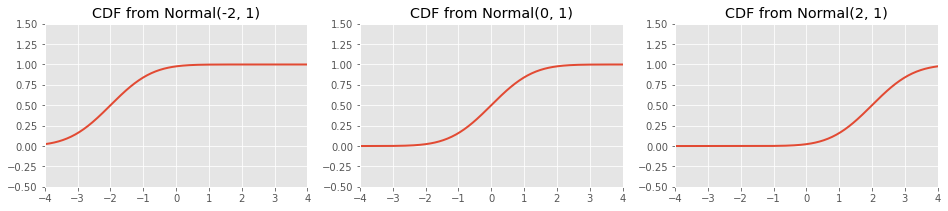

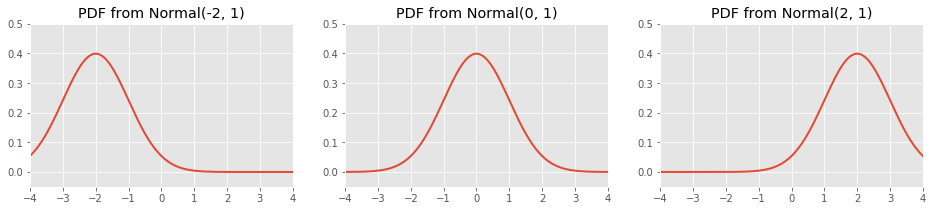

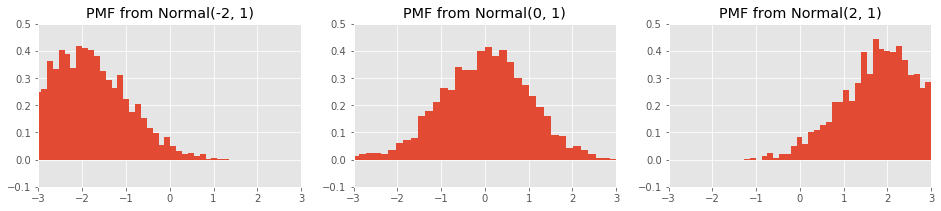

In [5]:
mus = [-2, 0, 2]
normal_dists_varying_mean = [
    spl.Normal(mu, 1) for mu in mus
]

x = np.linspace(-4, 4, num=250)
fig, axs = plt.subplots(1, 3, figsize=(16, 3))

for i, ax in enumerate(axs.flatten()):
    ax.plot(x, normal_dists_varying_mean[i].cdf(x), linewidth=2)
    ax.set_ylim(-0.5, 1.5)
    ax.set_xlim(-4, 4)
    ax.set_title("CDF from Normal({}, 1)".format(mus[i]))

x = np.linspace(-4, 4, num=250)
fig, axs = plt.subplots(1, 3, figsize=(16, 3))

for i, ax in enumerate(axs.flatten()):
    ax.plot(x, normal_dists_varying_mean[i].pdf(x), linewidth=2)
    ax.set_ylim(-0.05, 0.5)
    ax.set_xlim(-4, 4)
    ax.set_title("PDF from Normal({}, 1)".format(mus[i]))
    
x = np.linspace(-4, 4, num=250)
fig, axs = plt.subplots(1, 3, figsize=(16, 3))
    
for i, ax in enumerate(axs.flatten()):
    normal_samples = normal_dists_varying_mean[i].sample(2500)
    ax.hist(normal_samples, bins=50, normed=True)
    ax.set_xlim(-3, 3)
    ax.set_ylim(-0.1, 0.5)
    ax.set_title("PMF from Normal({}, 1)".format(mus[i]))

## Changing $\sigma$ stretches and shrinks the distribution function

/Users/alicakey/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


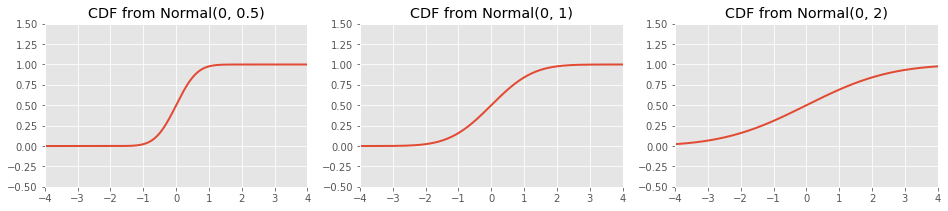

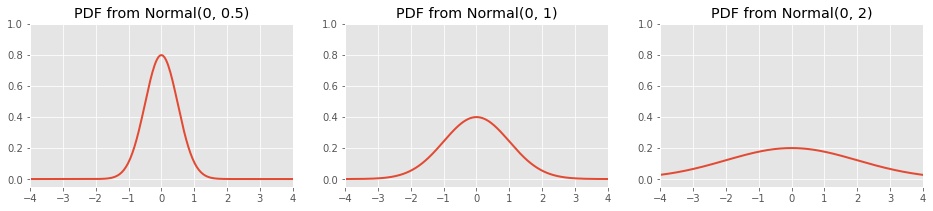

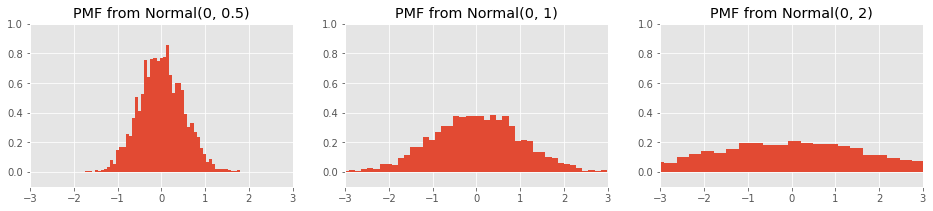

In [6]:
sigmas = [0.5, 1, 2]
normal_dists_varying_mean = [
    spl.Normal(0, sigma) for sigma in sigmas
]

x = np.linspace(-4, 4, num=250)
fig, axs = plt.subplots(1, 3, figsize=(16, 3))

for i, ax in enumerate(axs.flatten()):
    ax.plot(x, normal_dists_varying_mean[i].cdf(x), linewidth=2)
    ax.set_ylim(-0.5, 1.5)
    ax.set_xlim(-4, 4)
    ax.set_title("CDF from Normal(0, {})".format(sigmas[i]))

x = np.linspace(-4, 4, num=250)
fig, axs = plt.subplots(1, 3, figsize=(16, 3))

for i, ax in enumerate(axs.flatten()):
    ax.plot(x, normal_dists_varying_mean[i].pdf(x), linewidth=2)
    ax.set_ylim(-0.05, 01.0)
    ax.set_xlim(-4, 4)
    ax.set_title("PDF from Normal(0, {})".format(sigmas[i]))
    
x = np.linspace(-4, 4, num=250)
fig, axs = plt.subplots(1, 3, figsize=(16, 3))
    
for i, ax in enumerate(axs.flatten()):
    normal_samples = normal_dists_varying_mean[i].sample(2500)
    ax.hist(normal_samples, bins=50, normed=True)
    ax.set_xlim(-3, 3)
    ax.set_ylim(-0.1, 1.0)
    ax.set_title("PMF from Normal(0, {})".format(sigmas[i]))